# Programção Genética - Trabalho Prático
## Leonardo Augusto Ferreira
### leauferreira@cpdee.ufmg.br

### Alunos:
- Gabriel Camatta Zanotelli - 2018020140
- Lucas de Almeida Martins - 2018020328


**Observação:** A resolução dos exercícios apresentados se encontra no final do arquivo.

In [1]:
# Anaconda
# !conda install gplearn
# !conda install pyoperon
# !conda install sympy

# python - jupyter nootebook - colab
# !pip install gplearn
# !pip install pyoperon
# !pip install sympy

# documentation:
# https://docs.sympy.org/latest/install.html
# https://gplearn.readthedocs.io/en/stable/index.html
# https://github.com/heal-research/pyoperon

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import mean_squared_error

### Motivação:

\begin{equation}
f(\mathbf{x}) = x_0^2 - x_1^2 + x_1 -1
\end{equation}

Text(0, 0.5, '$x_1$')

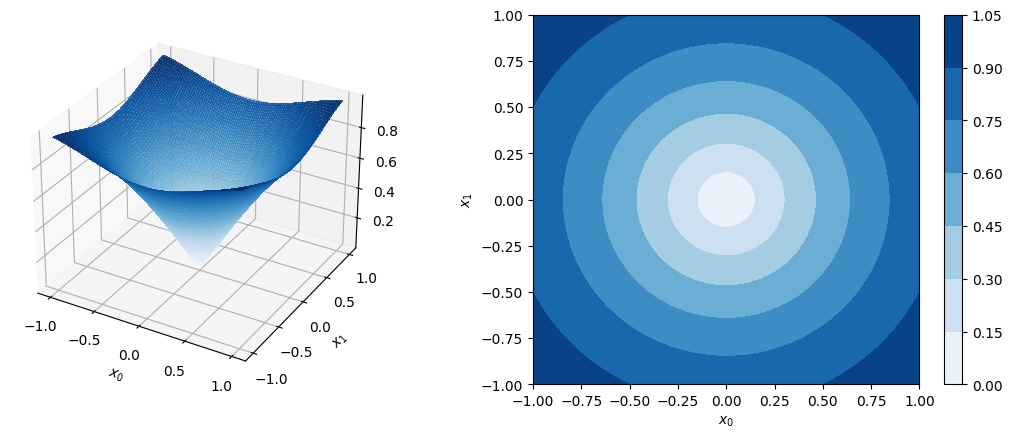

In [20]:
x_0 = np.linspace(-1, 1, 100)
x_1 = np.linspace(-1, 1, 100)
# f = lambda x_0, x_1 : x_0**2 - x_1**2 + x_1 - 1
f = lambda x_0, x_1 : np.sin(np.sqrt(x_0**2 + x_1**2))
X_0, X_1 = np.meshgrid(x_0, x_1)
F = f(X_0, X_1)

fig = plt.figure(figsize=plt.figaspect(.35))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X_0, X_1, F, rstride=1, cstride=1, cmap=cm.Blues, linewidth=0, antialiased=False, alpha=0.75)
cont = ax2.contourf(X_0, X_1, F, cmap=cm.Blues, origin='lower')
fig.colorbar(cont)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')

### GPLEARN

In [4]:
from gplearn.genetic import SymbolicRegressor

X_mot = np.random.uniform(-1, 1, 100).reshape(50, 2)
y_mot = f(X_mot[:, 0], X_mot[:, 1])

gplearn_model = SymbolicRegressor(population_size=5000,
                                  generations=50,
                                  function_set=('add', 'sub', 'mul', 'div'), 
                                  stopping_criteria=0.01,
                                  p_crossover=0.7, 
                                  p_subtree_mutation=0.1,
                                  p_hoist_mutation=0.05, 
                                  p_point_mutation=0.1,
                                  max_samples=0.9, 
                                  verbose=1,
                                  parsimony_coefficient=0.01,
                                  random_state=0)
gplearn_model.fit(X_mot, y_mot)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13      1.12209e+06        5         0.283635         0.422583      2.90m
   1     9.53           10.331       25         0.230115         0.406066      1.61m
   2     6.87          6.98326        7         0.202121         0.281859      1.57m
   3     4.80           2.0852       11         0.189061         0.348837      1.43m
   4     3.81         0.916976        7         0.187931          0.35017      1.37m
   5     4.87           1.2656        9         0.174885         0.375442      1.42m
   6     6.88          1.02125       13         0.134246         0.134246      1.36m
   7     7.29          3.29597       13        0.0729619        0.0729619      1.34m
   8     7.23          1.36868       13        0.0729619        0.0729619  

SymbolicRegressor(generations=50, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

mse: 2.411240456898086e-06


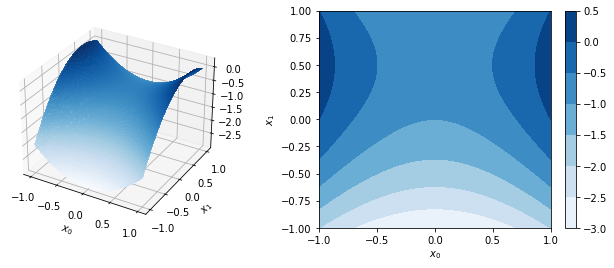

In [5]:
data = np.column_stack((X_0.ravel(), X_1.ravel()))
predict = gplearn_model.predict(data)
gp_Z = predict.reshape(X_0.shape)

fig = plt.figure(figsize=plt.figaspect(.35))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X_0, X_1, gp_Z, rstride=1, cstride=1, cmap=cm.Blues, linewidth=0, antialiased=False, alpha=0.75)
cont = ax2.contourf(X_0, X_1, gp_Z, cmap=cm.Blues, origin='lower')
fig.colorbar(cont)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')

print(f'mse: {mean_squared_error(gp_Z, F)}')

### PyOperon

In [6]:
from pyoperon.sklearn import SymbolicRegressor

operon_model = SymbolicRegressor(local_iterations=10,
                                 allowed_symbols='add,sub,mul,aq,constant,variable',
                                 generations=500,
                                 mutation_probability=0.25,
                                 crossover_probability=1.0,
                                 crossover_internal_probability=0.9,
                                 population_size=500, 
                                 max_length=25,
                                 objectives=['mse'],
                                 max_depth=5, 
                                 tournament_size= 10,
                                 epsilon = 1e-20,
                                 reinserter='keep-best',
                                 offspring_generator='basic')

operon_model.fit(X_mot, y_mot)
operon_model.get_model_string(operon_model.model_)

'(0.000 + (1.000 * (((((-0.000) * X1) + (1.000 * X2)) - 1.000) + ((((-1.465) * X1) + (1.465 * X2)) * (((-0.682) * X1) + ((-0.682) * X2))))))'

mse: 4.740164855631118e-15


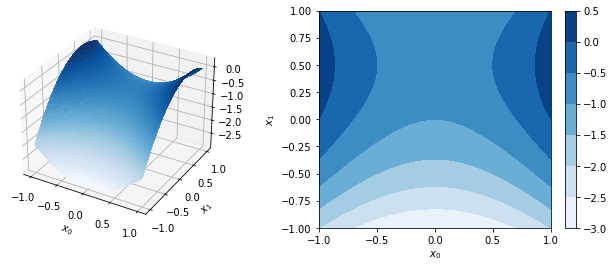

In [7]:
predict = operon_model.predict(data)
op_Z = predict.reshape(X_0.shape)

fig = plt.figure(figsize=plt.figaspect(.35))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X_0, X_1, op_Z, rstride=1, cstride=1, cmap=cm.Blues, linewidth=0, antialiased=False, alpha=0.75)
cont = ax2.contourf(X_0, X_1, op_Z, cmap=cm.Blues, origin='lower')
fig.colorbar(cont)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')

print(f'mse: {mean_squared_error(op_Z, F)}')

### Sympy

In [30]:
import sympy as sp

math_str = operon_model.get_model_string(operon_model.model_)
fsp = sp.simplify(sp.sympify(math_str))
fsp

1.0*X2 + 0.99913*(X1 - X2)*(X1 + X2) - 1.0

In [31]:
fsp.subs({'X1': 2, 'X2': 1}).evalf()

2.99739000000000

In [32]:
df_d_x1 = sp.diff(fsp, 'X1') 
df_d_x1

1.99826*X1

In [33]:
df_d_x2 = sp.diff(fsp, 'X2') 
df_d_x2

1.0 - 1.99826*X2

In [36]:
lamb_df = sp.lambdify('X2', df_d_x2, 'numpy')

lamb_df(np.arange(5))

array([ 1.     , -0.99826, -2.99652, -4.99478, -6.99304])

### Problema 1
O gráfico a seguir apresenta a variação da concentração de um hormônio $h$ em 1 (um) dia. A partir do momento em que um estímulo $s_1$ acontece em $t_0$ foi avaliada a concentração de $h$ em um grupo de teste e o resultado apresentado no gráfico é a média do grupo analisado. O objetivo desse problema é utilizar a programação genética para solucionar as seguintes tarefas:
- a) Determine uma expressão matemática que aproxima os dados disponibilizados no problema.
- b) Qual é o tempo $t_{max}$ necessário para que a concentração de hormônio h atinja o seu valor máximo? Por favor, descreva o seu raciocínio para solucionar essa tarefa. 
- c) Suponha que, em um segundo experimento, um estímulo $s_2$ ocorra quando a concentração de hormônio $h$ diminuir 70% do valor máximo. Determine qual o tempo $t_{s_2}$ em que o estímulo $s_2$ ocorrerá e gere um novo gráfico que apresente o comportamento da concentração de hormônio h no segundo experimento.

In [8]:
data = pd.read_csv('concentration.csv')
x = data['tempo(horas)']
y = data['concentração(und/ml)']
data.head()

,tempo(horas),concentração(und/ml)
0,5.655912,0.865342
1,21.653106,0.023354
2,4.075351,0.897590
3,10.349699,0.307491
4,7.140681,0.563640


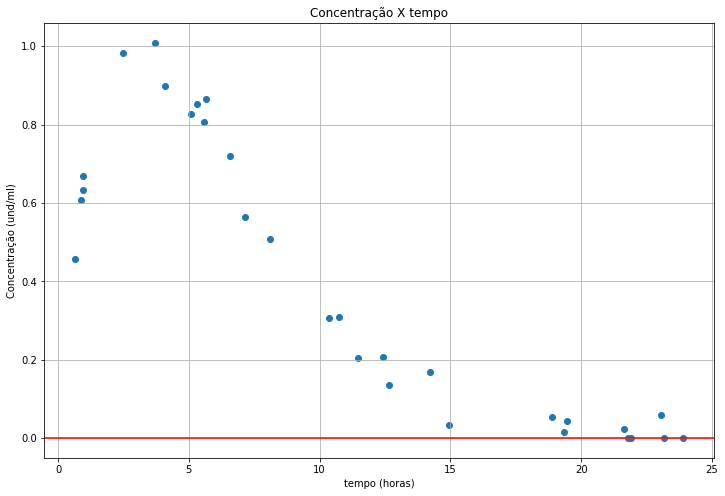

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Concentração X tempo")
plt.xlabel("tempo (horas)")
plt.grid()
plt.ylabel("Concentração (und/ml)")
plt.show()

### Problema 2

Vamos utilizar a regressão logística para ilustrar o problema 2. Para isso vamos começar analisando a função logistica que é determinada por:

\begin{equation}
g(z) = \frac{1}{1 + exp(-z)}
\end{equation}

Para entendermos o comportamento da função logística vamos analisar o seguinte gráfico:

In [10]:
# logistic function
def g(z):
    return 1/(1 + np.exp(-z))

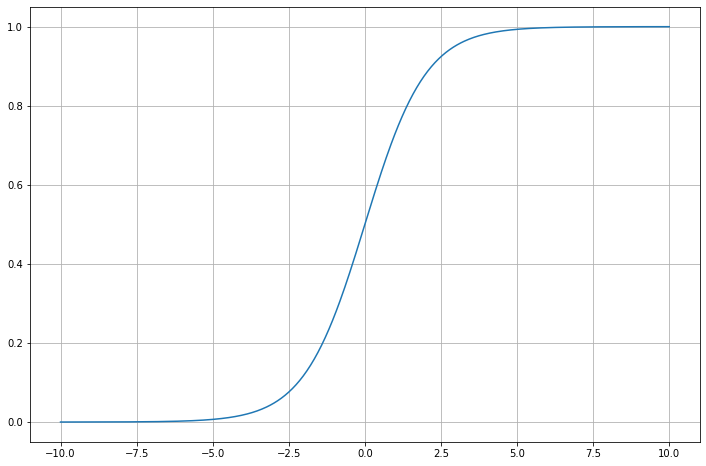

In [11]:
x = np.linspace(-10, 10, 500)

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, g(x))

Na regressão logística, a função $g(.)$ será utilizada para determinarmos os coeficientes $\beta$ de uma reta (em 2 dimensões) que será responsável por classificar os elementos de cada classe. Dessa forma temos:

\begin{equation}
\hat{y} = g(\mathbf{x}^T\pmb{\beta})) = \frac{1}{1 + \exp (-\mathbf{x}^T\pmb{\beta})}
\end{equation}

 A diferenciação da equação  $g(.)$ pode ser definida em termos dela própria. Para facilitar o entendimento vamos utilizar $\hat{y}$ para demonstrar:

\begin{equation}
    \label{eq:diff_sig}
    \frac{\partial \hat{y}}{\partial \pmb{\beta}} = \hat{y}(1 - \hat{y})
\end{equation}


Conforme encontrado em  *Bishop(2007)* uma das formas de obtermos os coeficientes $\pmb{\beta}$ é através da verossimilhança:

\begin{equation}
    p(\mathbf{y}|\pmb{\beta}) = \prod_{i = 1}^N \hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i} 
\end{equation}
onde $\mathbf{y} = (y_1, y_2, ..., y_n, ..., y_N)^T$ e a função de erro pode ser definida pelo negativo do logaritmo da verossimilhança:

\begin{equation}
    \label{eq:error_veros}
    E(\pmb{\beta}) = -\ln p(\mathbf{y}|\pmb{\beta}) = - \sum_{i=1}^N y_i \ln \hat{y}_i + (1 - y_i) \ln(1 - \hat{y}_i)
\end{equation}

In [30]:
# negative logarithm of the likelihood
def log_likelihood(x, y, beta):
    y_hat = g(np.dot(beta, x.T))
    return -(np.dot(y, np.log(y_hat)) + np.dot((1 - y), np.log((1 - y_hat))))


Vamos pegar o gradiente da função de erro $E$ em relação a $\pmb{\beta}$: 

\begin{equation}
    \label{eq:grad_veros}
    \frac{\partial E}{\partial \pmb{\beta}} = - \sum_{i = 1}^N(\hat{y}_i - y_i)\mathbf{x}_i
\end{equation}


Gradiente da função de erro em forma matricial:

\begin{equation}
    \frac{\partial E}{\partial \pmb{\beta}} = - \mathbf{X}^T(\mathbf{\hat{y} - y }) 
\end{equation}

In [31]:
# error function gradient
def gradient_error_beta(x, y, beta):
    y_hat = g(np.dot(beta, x.T))
    return - np.dot((y - y_hat), x)

A regressão logística não possui uma solução fechada, mas podemos usar o Gradiente Descendente para encontrar os coeficientes $\pmb{\beta}$ que minimizam a função de erro. 

Para aplicar o Gradiente Descendente, precisamos definir um tamanho de passo $\alpha$, um limite de erro $\epsilon$ e um número máximo de iterações. O algoritmo é implementado da seguinte forma:

1. Inicialize os coeficientes $\pmb{\beta}$ com valores aleatórios.
2. Enquanto o erro for maior que $\epsilon$ e o número de iterações for menor que o máximo:
   - Calcule o gradiente da função de erro em relação a $\pmb{\beta}$.
   - Atualize os coeficientes usando a equação $\pmb{\beta} \leftarrow \pmb{\beta} - \alpha \frac{\partial E}{\partial \pmb{\beta}}$.
3. Retorne os coeficientes $\pmb{\beta}$ atualizados.

Ao final da execução, os coeficientes $\pmb{\beta}$ estarão atualizados e podemos utilizar a superfície de decisão para classificar novos dados.

In [28]:
def logistic_regression(x, y, alpha=0.01, epsilon=1e-5, max_iter=10000):
    """
    Train a logistic regression model using gradient descent.
    :param x: Input data matrix of shape (n, d).
    :param y: Target variable vector.
    :param alpha: Learning rate.
    :param epsilon: Convergence threshold.
    :param max_iter: Maximum number of iterations.
    :return: Vector of coefficients beta.
    """
    n, d = x.shape
    beta = np.random.uniform(-1.0, 1.0, d)
    iter_count = 0
    prev_err = log_likelihood(x, y, beta)
    while (prev_err > epsilon and iter_count < max_iter):
        grad_err = gradient_error_beta(x, y, beta)
        beta -= alpha * grad_err
        curr_err = log_likelihood(x, y, beta)
        if abs(prev_err - curr_err) < epsilon:
            break
        prev_err = curr_err
        iter_count += 1
    return beta

#### Exemplo 1 - Blobs

Aplicação da regressão logística em dados artificiais através da rotina **make_blobs()**

C:\Users\gabri\AppData\Local\Temp\ipykernel_2632\303942914.py:4: RuntimeWarning: invalid value encountered in log
  return -(np.dot(y, np.log(y_hat)) + np.dot((1 - y), np.log((1 - y_hat))))


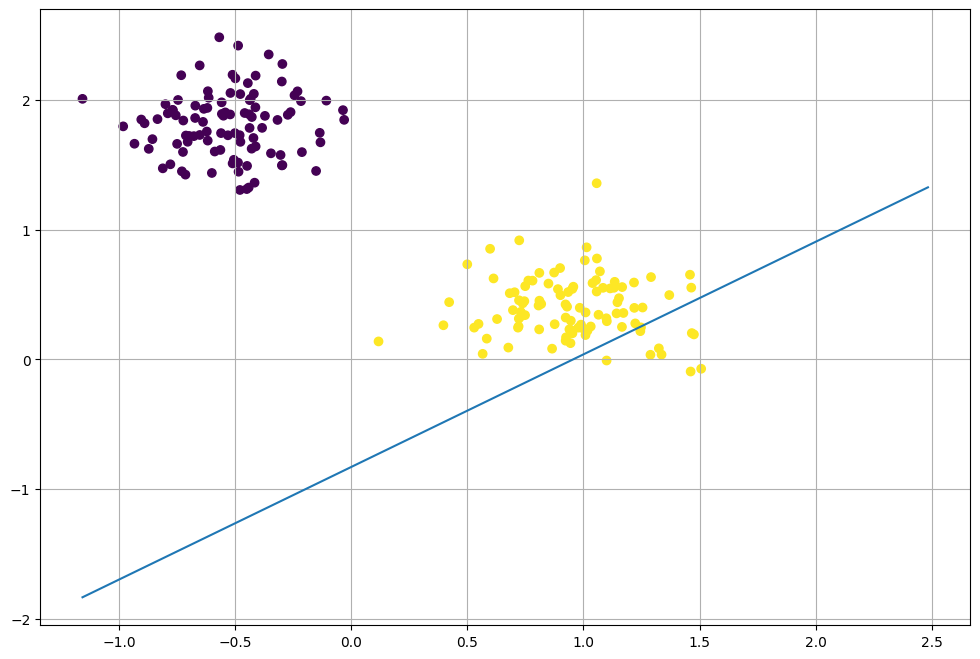

In [34]:
# Now we will use our logistic function on artificially generated data
xb, yb = make_blobs(n_samples=200, 
                    centers=2, 
                    n_features=2,
                    cluster_std=.25, 
                    center_box=(-2, 2),
                    random_state=42)

# Adding the bias term
Xb = np.c_[np.ones(200), xb]

# Generating the coefficients using logistic regression
beta = logistic_regression(Xb, yb)

# Plotting the decision boundary created from logistic regression
plt.figure(figsize=(12,8))

# Defining the line that separates the classes using the coefficients obtained from logistic regression
x_beta = np.linspace(np.amin(xb), np.amax(xb), 200)
y_beta = -beta[0] / beta[2] - beta[1]/beta[2] * x_beta

# Plotting the input data and decision boundary
plt.scatter(xb[:, 0], xb[:, 1], c=yb)
plt.plot(x_beta, y_beta)
plt.grid()

#### Exemplo 2 - Moons

Aplicação da regressão logística em dados artificiais através da rotina **make_moons()**

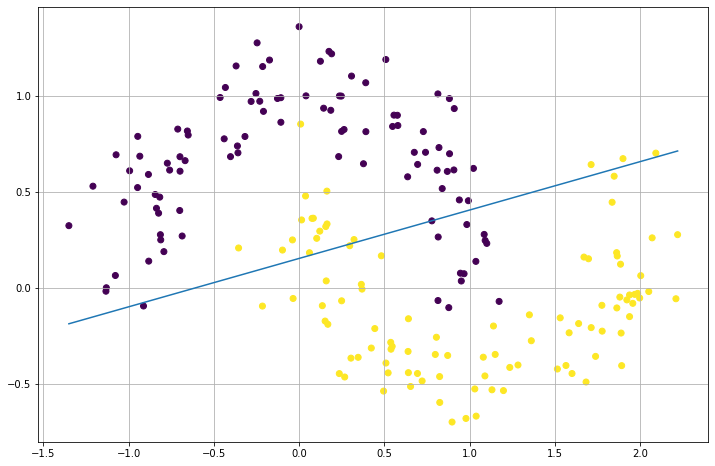

In [16]:
# Generate moon-shaped data with noise
X_moons, y_moons = make_moons(n_samples=200, noise=.15, random_state=42)

# Add bias column to the feature matrix
X_moons = np.c_[np.ones(200), X_moons]

# Train logistic regression model and get coefficients
beta_moons = logistic_regression(X_moons, y_moons)

# Compute line that separates the two classes based on the coefficients
x_line = np.linspace(np.amin(X_moons[:, 1]), np.amax(X_moons[:, 1]), 200)
y_line = -beta_moons[0] / beta_moons[2] - beta_moons[1] / beta_moons[2] * x_line

# Plot the data points and decision boundary
plt.figure(figsize=(12, 8))
plt.scatter(X_moons[:, 1], X_moons[:, 2], c=y_moons)
plt.plot(x_line, y_line)
plt.grid()

Agora que você tem mais conhecimento sobre regressão logística, as seguintes tarefas devem ser realizadas:

- a) Determine uma métrica para comparar os Exemplos 1 (Blobs) e 2 (Moons) do problema 2. Qual dos dois exemplos a regressão logística apresentou melhor desempenho?

- b) Utilize a **Programação Genética** para melhorar o desempenho da classificação que obteve o pior resultado. Utilize a métrica escolhida na etapa anterior para comparar a nova classificação gerada pela **Programação Genética** com as classificações anteriores.

- c) Assim como a superfície de decisão gerada pela regressão logística, apresente a curva que representa o modelo e a superfície de decisão criada  pela **Programação Genética**.

----

# Resolução

## Problema 1

a)  Para  a primeira questão, utilizamos o código apresentado anteriormente, substituindo os dados utilizados pelos do arquivo "concentration.csv'

In [26]:
from gplearn.genetic import SymbolicRegressor

data = pd.read_csv('concentration.csv')
x = data['tempo(horas)']
y = data['concentração(und/ml)']
x_size = [i for i in range(len(x) +1)]


X_mot = np.vstack((x, y)).T


# y_mot = f(X_mot[:, 0], X_mot[:, 1])

gplearn_model = SymbolicRegressor(population_size=5000,
                                  generations=50,
                                  function_set=('add', 'sub', 'mul', 'div', 'log', 'cos'),
                                  stopping_criteria=0.01,
                                  p_crossover=0.7,
                                  p_subtree_mutation=0.1,
                                  p_hoist_mutation=0.05,
                                  p_point_mutation=0.1,
                                  max_samples=0.9,
                                  verbose=1,
                                  parsimony_coefficient=0.01,
                                  random_state=0)
gplearn_model.fit(X_mot, X_mot[:, 0])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    19.61            16206        5                0                0      3.03m


SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'log', 'cos'),
                  generations=50, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

## Problema 2

In [ ]:
from sklearn.metrics import accuracy_score

# BLOBS
xb, yb = make_blobs(n_samples=200,
                    centers=2,
                    n_features=2,
                    cluster_std=.25,
                    center_box=(-2, 2),
                    random_state=42)
Xb = np.c_[np.ones(200), xb]
beta = logistic_regression(Xb, yb)


# MOONS
X_moons, y_moons = make_moons(n_samples=200, noise=.15, random_state=42)
X_moons = np.c_[np.ones(200), X_moons]


# Cálculo da acurácia para o exemplo 1 (Blobs)
accuracy_blobs = accuracy_score(yb_test, y_pred_blobs)

# Cálculo da acurácia para o exemplo 2 (Moons)
accuracy_moons = accuracy_score(y_moons_test, y_pred_moons)


# Calculando as métricas de desempenho
accuracy_blobs = accuracy_score(yb_test, y_pred_blobs)
precision_blobs = precision_score(yb_test, y_pred_blobs)
recall_blobs = recall_score(yb_test, y_pred_blobs)
f1_score_blobs = f1_score(yb_test, y_pred_blobs)


# Treinando o modelo de regressão logística para o exemplo 2
beta_moons = logistic_regression(X_moons_train, y_moons_train)

# Fazendo previsões para os dados de teste
y_pred_moons = np.round(g(np.dot(beta_moons, X_moons_test.T)))

# Calculando as métricas de desempenho
accuracy_moons = accuracy_score(y_moons_test, y_pred_moons)
precision_moons = precision_score(y_moons_test, y_pred_moons)
recall_moons = recall_score(y_moons_test, y_pred_moons)
f1_score_moons = f1_score(y_moons_test, y_pred_moons)